## Preprocessing 

In [5]:
from keras.datasets import imdb
import numpy as np

In [6]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words = 10000)

In [7]:
def vectorize(sentence, dim = 10000):
    output = np.zeros((len(sentence),dim))
    
    for i,idx in enumerate(sentence):
        output[i,idx] = 1
        
    return output
        

In [8]:
X_train = vectorize(XT)
X_test = vectorize(Xt)

In [9]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

## Model Training

In [10]:
from keras import models 
from keras.layers import Dense

In [12]:
model = models.Sequential()
model.add(Dense(16,activation = 'relu',input_shape=(10000,)))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics='accuracy')

In [14]:
#split the data into train and validation
X_val = X_train[:5000]
X_train_new = X_train[5000:]
Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]


In [15]:
hist = model.fit(X_train_new,Y_train_new,epochs = 4,batch_size = 256,validation_data = (X_val,Y_val))


Epoch 1/4
79/79 [==============================] - 12s 119ms/step - loss: 0.5315 - accuracy: 0.7501 - val_loss: 0.3048 - val_accuracy: 0.8834
Epoch 2/4
79/79 [==============================] - 1s 13ms/step - loss: 0.2312 - accuracy: 0.9214 - val_loss: 0.2848 - val_accuracy: 0.8868
Epoch 3/4
79/79 [==============================] - 1s 14ms/step - loss: 0.1723 - accuracy: 0.9394 - val_loss: 0.3176 - val_accuracy: 0.8810
Epoch 4/4
79/79 [==============================] - 1s 13ms/step - loss: 0.1316 - accuracy: 0.9554 - val_loss: 0.3036 - val_accuracy: 0.8880


## Visualization

In [16]:
import matplotlib.pyplot as plt
h = hist.history

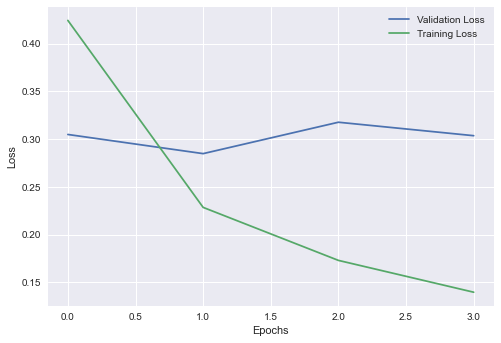

<Figure size 720x720 with 0 Axes>

In [18]:
plt.plot(h['val_loss'],label ="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.style.use("seaborn")
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.show()

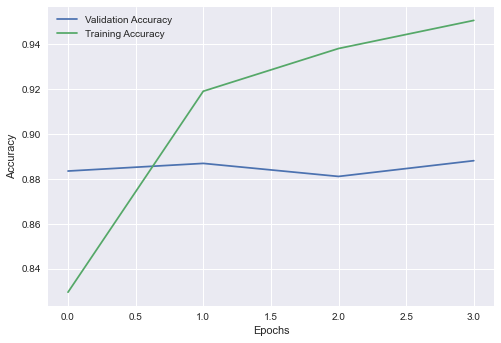

<Figure size 720x720 with 0 Axes>

In [19]:
plt.plot(h['val_accuracy'],label ="Validation Accuracy")
plt.plot(h['accuracy'],label="Training Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.style.use("seaborn")
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.show()

## Accuracy

In [20]:
model.evaluate(X_test,Y_test)[1]

782/782 [==============================] - 3s 4ms/step - loss: 0.3285 - accuracy: 0.8759


0.8758800029754639